## Random Forest Predicting a Sale Price

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics
import feather

In [3]:
import seaborn as sns
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_csv('excel/HousesData/train.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [7]:
df.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [8]:
def display_all(df):
    with pd.option_context("display.max_rows", 2000, "display.max_columns", 1000): 
        display(df)

In [9]:
display_all(df.tail(10).T)

,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
Id,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,90,20,180,20,20,60,20,70,20,20
MSZoning,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
LotFrontage,60,78,35,90,62,62,85,66,68,75
LotArea,9000,9262,3675,17217,7500,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,Pave,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub


In [10]:
display_all(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Prices are currently presented in thousands we can convert the values in a log function this way we shall be dealing with a smaller number, but also that number can be converted back by calling the exponent on the column.

In [11]:
df['SalePricelog']=np.log(df['SalePrice'])

In [12]:
 df[['SalePrice','SalePricelog']].tail() #= np.exp(df['SalePricelog'])

,SalePrice,SalePricelog
1455,175000,12.072541
1456,210000,12.254863
1457,266500,12.493130
1458,142125,11.864462
1459,147500,11.901583


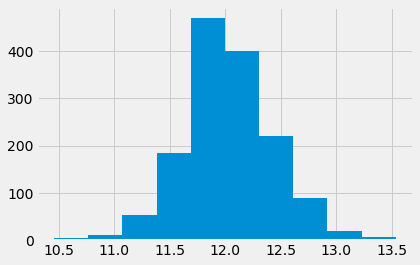

In [13]:
df['SalePricelog'].hist()

In [14]:
df['SalePricelog'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePricelog, dtype: float64

In [15]:
display_all(df.isnull().sum().sort_index()/len(df) *100)

1stFlrSF          0.000000
2ndFlrSF          0.000000
3SsnPorch         0.000000
Alley            93.767123
BedroomAbvGr      0.000000
BldgType          0.000000
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtFinType1      2.534247
BsmtFinType2      2.602740
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
BsmtQual          2.534247
BsmtUnfSF         0.000000
CentralAir        0.000000
Condition1        0.000000
Condition2        0.000000
Electrical        0.068493
EnclosedPorch     0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
Fence            80.753425
FireplaceQu      47.260274
Fireplaces        0.000000
Foundation        0.000000
FullBath          0.000000
Functional        0.000000
GarageArea        0.000000
GarageCars        0.000000
GarageCond        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageType        5.547945
G

In [16]:
os.makedirs('tmph',exist_ok=True)
df.to_feather('tmph/houseSale')

In [17]:
df = feather.read_dataframe('tmph/houseSale')

In [18]:
df = df.drop(['SalePrice'], axis= 1)

Now we want all our categorical data to be numerical rather than string objects for this we shall employ FastAI's __proc_df()__ function.

Before we do that we might want use the pandas dataframe to turn data string data into categorical data.

In [19]:
#This changes the way pandas sees the strings in the dataframe, it instead now sees categories.
train_cats(df)

In [20]:
df.MSZoning = df.MSZoning.cat.codes

In [21]:
dfh, y, nas = proc_df(df, 'SalePricelog')

In [22]:
dfh.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
1455,1456,60,3,62.0,7917,2,0,4,4,1,...,0,0,0,8,2007,9,5,False,False,False
1456,1457,20,3,85.0,13175,2,0,4,4,1,...,3,0,0,2,2010,9,5,False,False,False
1457,1458,70,3,66.0,9042,2,0,4,4,1,...,1,3,2500,5,2010,9,5,False,False,False
1458,1459,20,3,68.0,9717,2,0,4,4,1,...,0,0,0,4,2010,9,5,False,False,False
1459,1460,20,3,75.0,9937,2,0,4,4,1,...,0,0,0,6,2008,9,5,False,False,False


 Null values sorted now we move onto creating a model.

In [23]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(dfh, y)
model.score(dfh, y)

0.9726618033912083

# Split function: splitting the dat into two set the valid and the trainning set 

In [24]:
def split_vals(a, n): return a[:n].copy(), a[n:].copy()

n_valid = 460
n_train = len(dfh)-n_valid
df_train, df_valid = split_vals(df, n_train)
X_train, X_valid = split_vals(dfh, n_train)
y_train, y_valid = split_vals(y, n_train)

X_train.shape, y_train.shape, y_valid.shape,df_train.shape

((1000, 83), (1000,), (460,), (1000, 81))

In [25]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())
     
def print_score(model):
     res = [f"train_set_RMSE: {rmse(model.predict(X_train), y_train)}", 
            f'Validation_set_rmse: {rmse(model.predict(X_valid), y_valid)}',
            f'train_set_score: {model.score(X_train, y_train)}', 
            f'validation_set_score: {model.score(X_valid, y_valid)}']
     if hasattr(model, 'oob_score_'): res.append(model.oob_score_)
     print(res)

In [26]:
model = RandomForestRegressor(n_jobs=-1)
%time model.fit(X_train,y_train)
print_score(model)

CPU times: user 281 ms, sys: 15.6 ms, total: 297 ms
Wall time: 118 ms
['train_set_RMSE: 0.06530373895486787', 'Validation_set_rmse: 0.149436973798463', 'train_set_score: 0.9740963224903665', 'validation_set_score: 0.8490933270399472']


In [27]:
model  = RandomForestRegressor(n_estimators=1, max_depth=5, bootstrap=False, n_jobs=-1)
%time model.fit(X_train,y_train)
print_score(model)

CPU times: user 31.2 ms, sys: 0 ns, total: 31.2 ms
Wall time: 122 ms
['train_set_RMSE: 0.1534649923200544', 'Validation_set_rmse: 0.19688470216143955', 'train_set_score: 0.8569446929876724', 'validation_set_score: 0.7380512913076402']


In [28]:
model  = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
%time model.fit(X_train,y_train)
print_score(model)

CPU times: user 46.9 ms, sys: 0 ns, total: 46.9 ms
Wall time: 113 ms
['train_set_RMSE: 2.655674157427194e-05', 'Validation_set_rmse: 0.21287840314228385', 'train_set_score: 0.9999999957161435', 'validation_set_score: 0.6937645076751774']


In [29]:
dfcorr = df.corr()
dfcorr

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePricelog
Id,1.000000,0.011156,-0.006096,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.017942
MSSubClass,0.011156,1.000000,0.035900,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
MSZoning,-0.006096,0.035900,1.000000,-0.111690,-0.034452,-0.160099,0.186951,-0.308908,-0.174728,-0.067487,...,-0.009477,-0.154704,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,-0.188860
LotFrontage,-0.010601,-0.386347,-0.111690,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.355878
LotArea,-0.033226,-0.139781,-0.034452,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
OverallQual,-0.028365,0.032628,-0.160099,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817184
OverallCond,0.012609,-0.059316,0.186951,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868
YearBuilt,-0.012713,0.027850,-0.308908,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,-0.021998,0.040581,-0.174728,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,-0.050298,0.022936,-0.067487,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.430809


Feature that we might need to focus on 

In [30]:
dfcorr['SalePricelog'].sort_values(ascending=False).head(10)

SalePricelog    1.000000
OverallQual     0.817184
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
Name: SalePricelog, dtype: float64

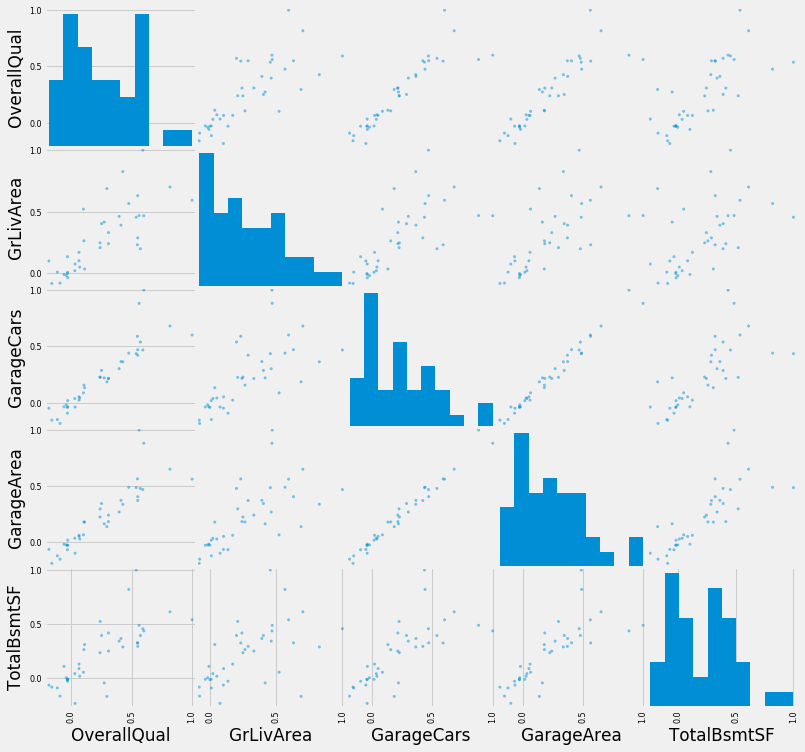

In [31]:
from pandas.plotting import scatter_matrix

attribute = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF']
scatter_matrix(dfcorr[attribute], figsize=(12,12))

plt.show()


In [32]:
#df['SalePrice'].hist(kind='kde')

In [33]:
predictions = np.stack([t.predict(X_valid) for t in model.estimators_])
predictions[:,0], np.mean(predictions[:,0]), y_valid[0]

(array([11.31447]), 11.314474526246391, 11.314474526246391)

In [34]:
# tree predictions 
predictions.shape

(1, 460)

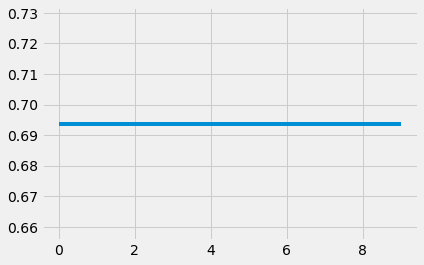

In [35]:
plt.plot([metrics.r2_score(y_valid, np.mean(predictions[:i+1], axis=0)) for i in range(10)])

In [36]:
model = RandomForestRegressor(n_estimators=45, n_jobs=-1)
%time model.fit(X_train,y_train)
print_score(model)

CPU times: user 1.3 s, sys: 15.6 ms, total: 1.31 s
Wall time: 478 ms
['train_set_RMSE: 0.05931831652679116', 'Validation_set_rmse: 0.14191566580202822', 'train_set_score: 0.9786271241041562', 'validation_set_score: 0.8639016080181914']


Using the tree as a whole

In [37]:
dfh_trn, y_trn, nas = proc_df(df, 'SalePricelog')
X_train, X_valid = split_vals( dfh_trn, n_train)
y_train, y_valid = split_vals( y_trn, n_train)

In [38]:
model = RandomForestRegressor(n_estimators=45,n_jobs=-1, oob_score=True)
%time model.fit(X_train,y_train)
print_score(model)

CPU times: user 1.27 s, sys: 31.2 ms, total: 1.3 s
Wall time: 500 ms
['train_set_RMSE: 0.05862217998881801', 'Validation_set_rmse: 0.1417204864952697', 'train_set_score: 0.9791258279422435', 'validation_set_score: 0.8642757079872613', 0.8595715056197784]


In [39]:
predictions = np.stack([t.predict(X_valid) for t in model.estimators_])
np.mean(predictions[:,0]), np.std(predictions[:,0])

(11.354096640371413, 0.31652260162562124)

In [40]:
#def get_prediction(t): return t.predict(X_valid)
#prediction = np.stack(parallel_trees(model, get_prediction))
#np.mean(prediction[:,0]), np.std(prediction[:,0])

In [41]:
x = df_valid.copy()

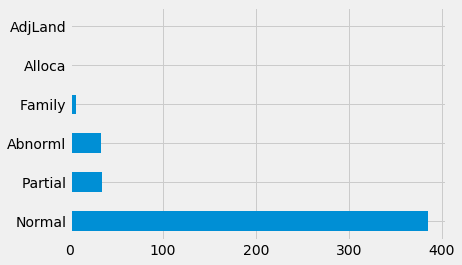

In [42]:
x = df_valid.copy()
x['predictions_std'] = np.std(predictions, axis=0)
x['Mean_preds'] = np.mean(predictions, axis=0)
x.SaleCondition.value_counts().plot.barh();

In [43]:
df_valid.head().T

,1000,1001,1002,1003,1004
Id,1001,1002,1003,1004,1005
MSSubClass,20,30,20,90,120
MSZoning,3,3,3,3,3
LotFrontage,74,60,75,NaN,43
LotArea,10206,5400,11957,11500,3182
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [44]:
from pdpbox import pdp
from plotnine import *

In [54]:
fi = rf_feat_importance(model, dfh)
fi[:20]

,cols,imp
17,OverallQual,0.544156
46,GrLivArea,0.117046
38,TotalBsmtSF,0.051154
61,GarageCars,0.036261
43,1stFlrSF,0.023649
34,BsmtFinSF1,0.022521
62,GarageArea,0.020445
19,YearBuilt,0.019996
20,YearRemodAdd,0.013245
4,LotArea,0.012204


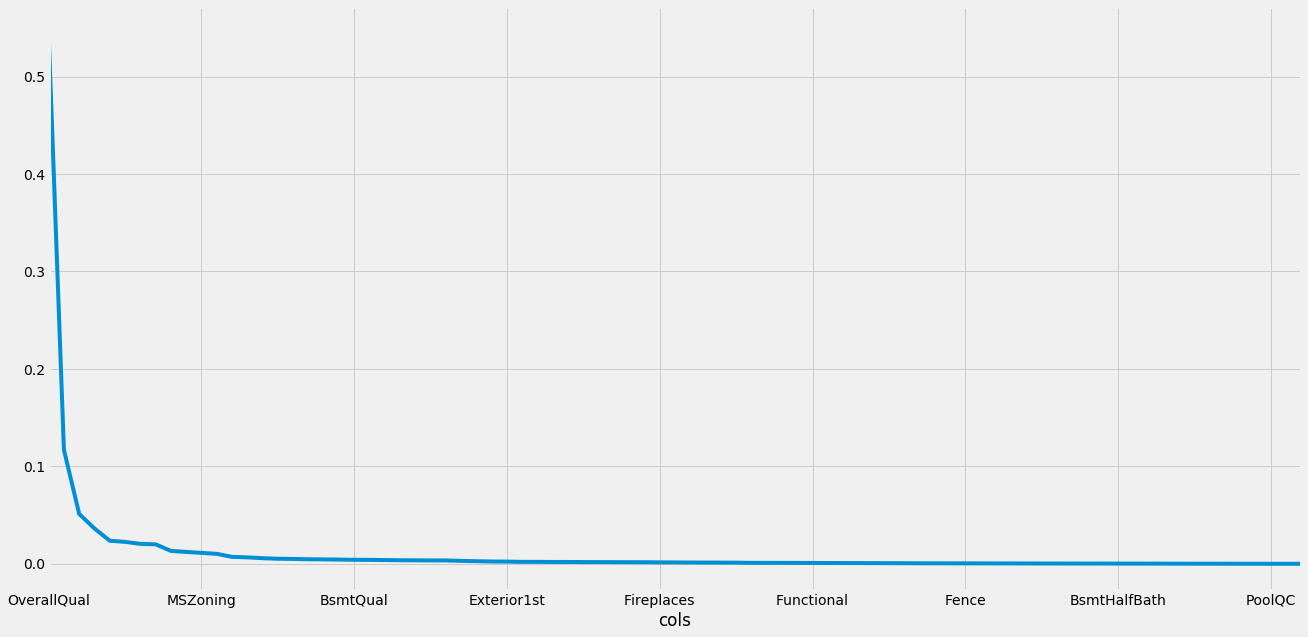

In [55]:
fi.plot('cols', 'imp', figsize=(20,10), legend=False)

In [57]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh',
                                figsize=(16,10), legend=False)

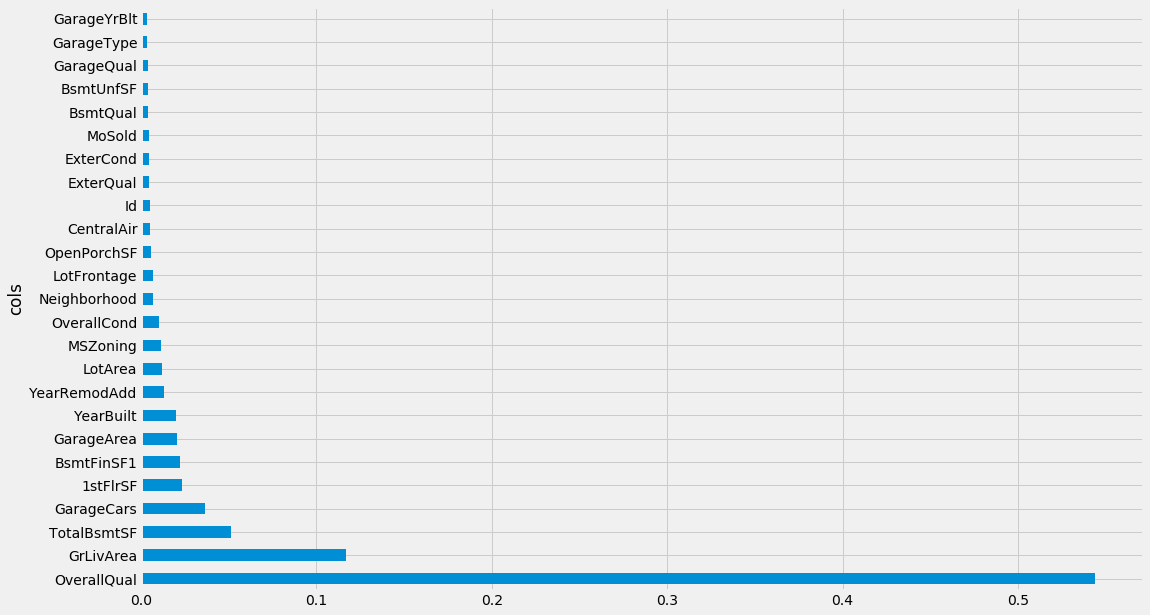

In [58]:
plot_fi(fi[:25])

In [59]:
to_keep = fi[fi.imp>0.02].cols; len(to_keep)

7

In [61]:
df_keep = dfh[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_train)

In [63]:
model = RandomForestRegressor(n_estimators=45,min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
%time model.fit(X_train,y_train)
print_score(model)

CPU times: user 219 ms, sys: 0 ns, total: 219 ms
Wall time: 178 ms
['train_set_RMSE: 0.11122443672186709', 'Validation_set_rmse: 0.15556996861653336', 'train_set_score: 0.9248574792746089', 'validation_set_score: 0.8364525247633112', 0.825351615655368]


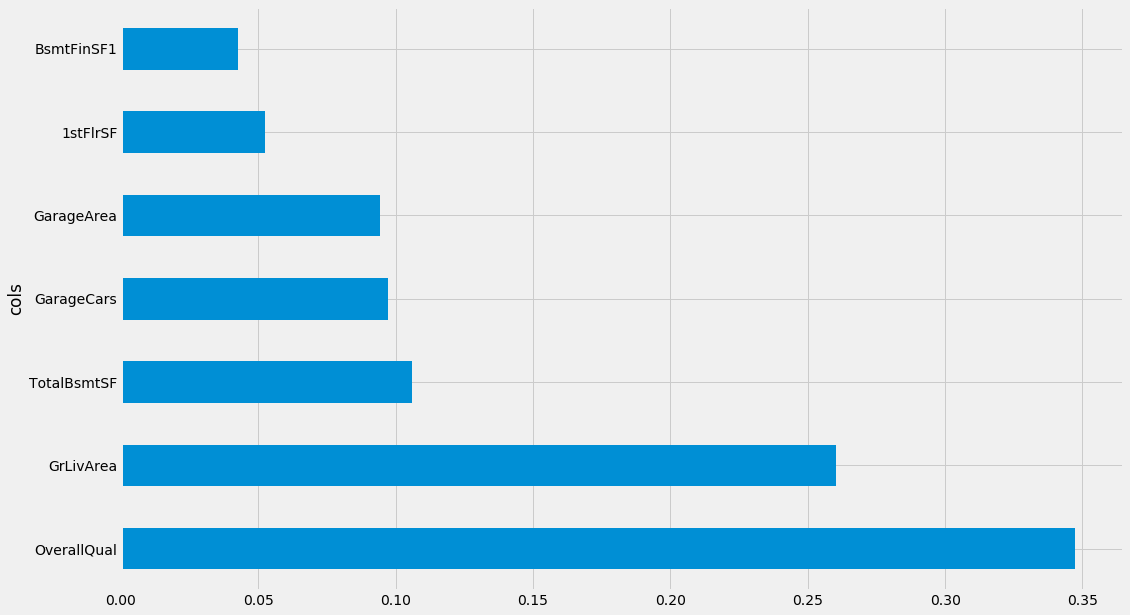

In [65]:
fi = rf_feat_importance(model, df_keep)
plot_fi(fi)

In [66]:
dfh, y, nas = proc_df(df, 'SalePricelog', max_n_cat=8)
X_train, X_valid =split_vals(dfh, n_train)

In [68]:
model = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
model.fit(X_train, y_train)
print_score(model)

['train_set_RMSE: 0.08102645438995856', 'Validation_set_rmse: 0.14223703271150712', 'train_set_score: 0.9601214829372575', 'validation_set_score: 0.8632845226385971', 0.8566513381734421]


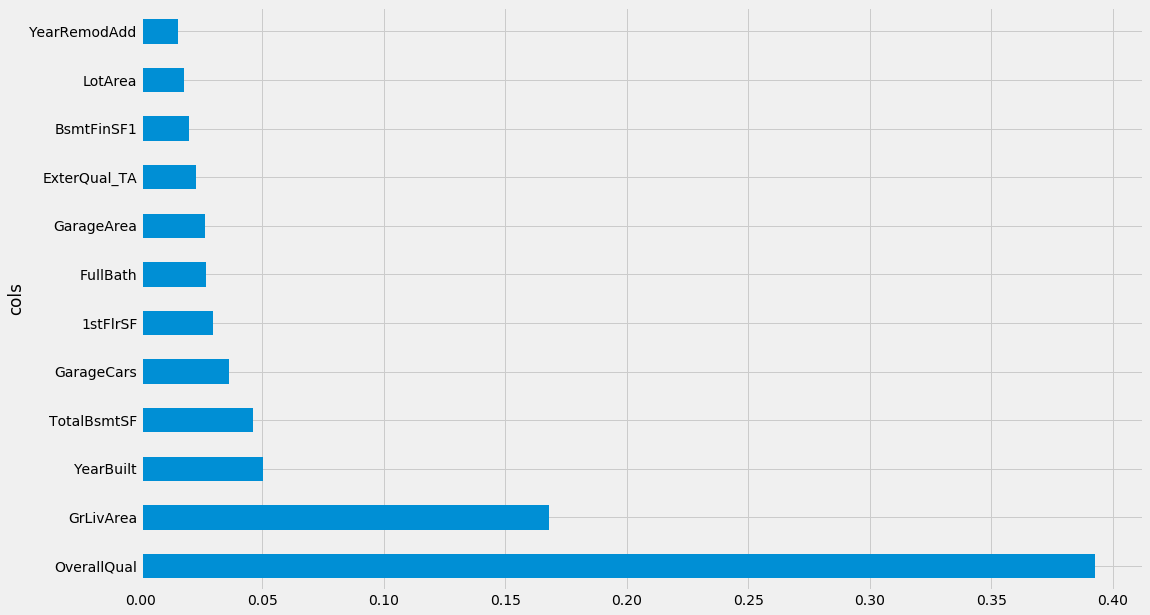

In [71]:
fi = rf_feat_importance(model,dfh)
plot_fi(fi[:12]);

In [72]:

from scipy.cluster import hierarchy as hc

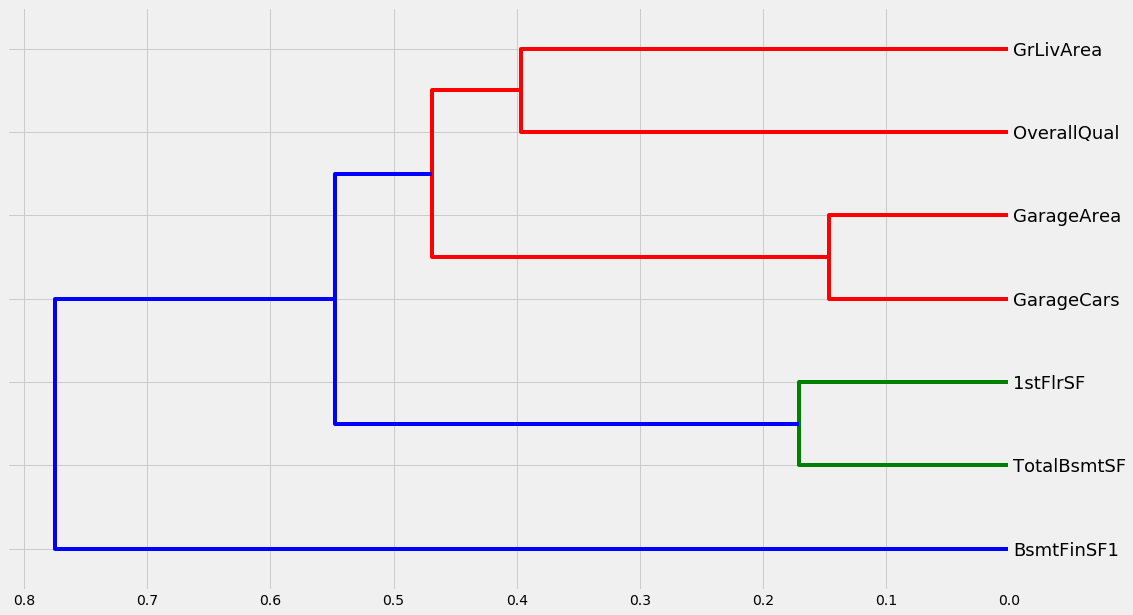

In [73]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condesed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condesed,method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=18)
plt.show()

In [76]:
df_keep['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

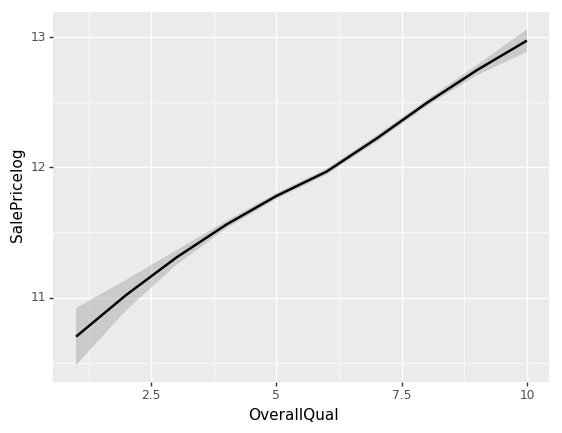

<ggplot: (-9223363251122827239)>

In [83]:
ggplot(df, aes( 'OverallQual','SalePricelog'))+stat_smooth(se=True, method='loess')

In [84]:
x=dfh

In [87]:
def plot_pdp(feat, clusters=None, feat_name=None):
     feat_name = feat_name or feat
     p = pdp.pdp_isolate(model,x,x.columns, feat)
     return pdp.pdp_plot(p, feat_name, plot_lines= True,
                   cluster=clusters is not None, 
                   n_cluster_centers=clusters)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fd96acb5128>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fd969c27048>})

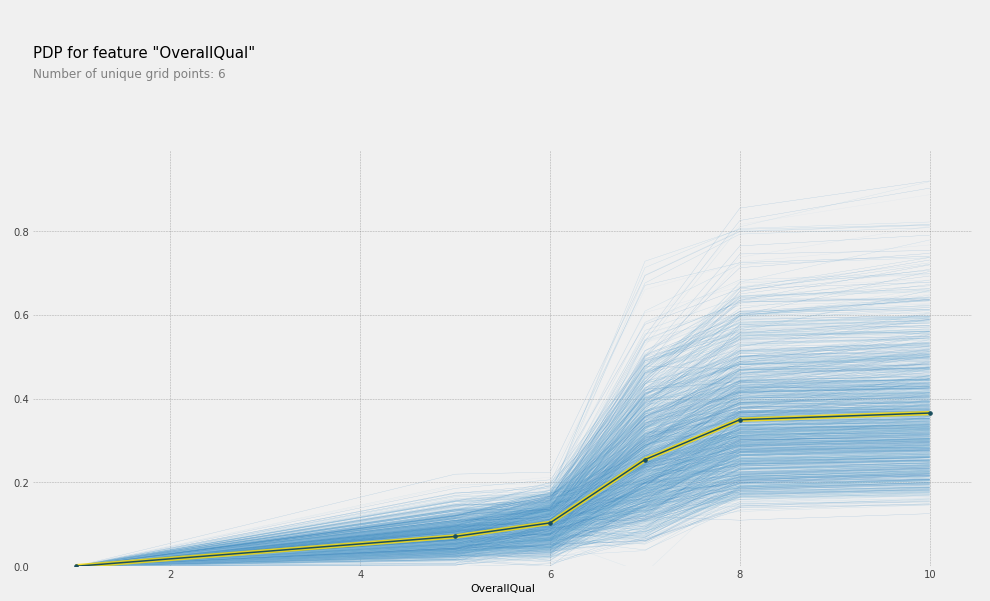

In [90]:
plot_pdp('OverallQual') #, clusters=6)

In [91]:
%time preds = np.stack([t.predict(X_valid) for t in model.estimators_])
np.mean(preds[:,0]),np.std(preds[:,0])

CPU times: user 516 ms, sys: 15.6 ms, total: 531 ms
Wall time: 502 ms


(11.26116281873162, 0.2994288003725174)

In [93]:
def get_preds(t): return t.predict(X_valid)
%time preds = np.stack(parallel_trees(model, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 46.9 ms, sys: 828 ms, total: 875 ms
Wall time: 2.14 s


(11.26116281873162, 0.2994288003725174)

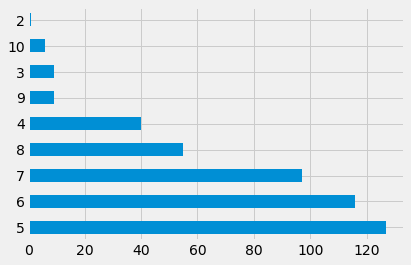

In [101]:
x = df_valid.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x.OverallQual.value_counts().plot.barh();

In [106]:
flds = ['OverallQual', 'SalePricelog', 'pred', 'pred_std']
enc_summ = x[flds].groupby('OverallQual',as_index=False).mean()
enc_summ

,OverallQual,SalePricelog,pred,pred_std
0,2,11.002100,11.003202,0.353826
1,3,11.374574,11.461186,0.262232
2,4,11.550224,11.595485,0.202141
3,5,11.796038,11.807178,0.146115
4,6,11.975274,11.934515,0.146949
5,7,12.213652,12.223710,0.128752
6,8,12.462245,12.492102,0.156867
7,9,12.797877,12.745235,0.191858
8,10,12.932785,12.851152,0.244419
